# Basic Distributions

### A. Taylan Cemgil
### Boğaziçi University, Dept. of Computer Engineering


### Notebook Summary
* We review the notation and parametrization of densities of some basic distributions that are often encountered
* We show how random numbers are generated using python libraries
* We show some basic visualization methods such as displaying histograms 

# Sampling From Basic Distributions

Sampling from basic distribution is easy using the numpy library. 
 
Formally we will write

$x \sim p(X|\theta)$

where $\theta$ is the _parameter vector_, $p(X| \theta)$ denotes the _density_ of the random variable $X$ and $x$ is a _realization_, a particular draw from the density $p$.

The following distributions are building blocks from which more complicated processes may be constructed. It is important to have a basic understanding of these distributions.


### Continuous Univariate 
* Uniform $\mathcal{U}$
* Univariate Gaussian $\mathcal{N}$
* Gamma $\mathcal{G}$
* Inverse Gamma $\mathcal{IG}$
* Beta $\mathcal{B}$

### Discrete 
* Poisson $\mathcal{P}$
* Bernoulli $\mathcal{BE}$
* Binomial $\mathcal{BI}$
* Categorical $\mathcal{M}$
* Multinomial $\mathcal{M}$

### Continuous Multivariate (todo)
* Multivariate Gaussian $\mathcal{N}$
* Dirichlet $\mathcal{D}$

### Continuous Matrix-variate (todo)
* Wishart $\mathcal{W}$
* Inverse Wishart $\mathcal{IW}$
* Matrix Gaussian $\mathcal{N}$


## Sampling from the standard uniform $\mathcal{U}(0,1)$ 

For generating a single random number in the interval $[0, 1)$ we use the notation
$$
x_1 \sim \mathcal{U}(x; 0,1)
$$

In python, this is implemented as

In [6]:
import numpy as np

x_1 = np.random.rand()

print(x_1)

0.7605777935375794


We can also generate an array of realizations $x_i$ for $i=1 \dots N$,
$$
x_i \sim \mathcal{U}(x; 0,1)
$$

In [7]:
import numpy as np

N = 5
x = np.random.rand(N)

print(x)


[ 0.71384565  0.31621644  0.91739919  0.55668914  0.61991602]


For large $N$, it is more informative to display an histogram of generated data: 

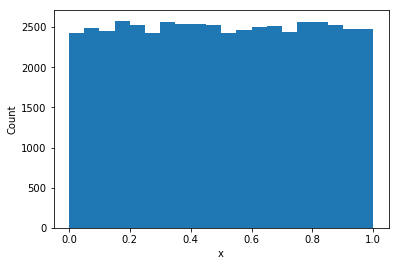

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Number of realizations
N = 50000
x = np.random.rand(N)

plt.hist(x, bins=20)
plt.xlabel('x')
plt.ylabel('Count')
plt.show()

$\newcommand{\indi}[1]{\left[{#1}\right]}$
$\newcommand{\E}[1]{\left\langle{#1}\right\rangle}$


We know that the density of the uniform distribution $\mathcal{U}(0,1)$ is

$$
\mathcal{U}(x; 0,1) = \left\{ \begin{array}{cc}  1 & 0 \leq x < 1 \\ 0 & \text{otherwise} \end{array}  \right.
$$
or using the indicator notation
$$
\mathcal{U}(x; 0,1) = \left[ x \in [0,1) \right]
$$

#### Indicator function

To write and manipulate discrete probability distributions in algebraic expression, the *indicator* function is useful:

$$ \left[x\right] = \left\{ \begin{array}{cc}
                                  1 & x\;\;\text{is true} \\
                                  0 & x\;\;\text{is false}
                                \end{array}
 \right.$$
This notation is also known as the Iverson's convention. 

#### Aside: How to plot the density and the histogram onto the same plot? 

In one dimension, the histogram is simply the count of the data points that fall to a given interval. Mathematically, we have
$j = 1\dots J$ intervals where $B_j = [b_{j-1}, b_j]$ and $b_j$ are bin boundries such that $b_0 < b_1 < \dots < b_J$. 
$$
h(x) =  \sum_{j=1}^J \sum_{i=1}^N \indi{x \in B_j} \indi{x_i \in B_j}
$$
This expression, at the first sight looks somewhat more complicated than it really is. The indicator product just encodes the logical condition $x \in B_j$ __and__ $x_i \in B_j$. The sum over $j$ is just a convenient way of writing the result instead of specifying the histogram as a case by case basis for each bin. It is important to get used to such nested sums.

When the density $p(x)$ is given, the probability that a single realization is in bin $B_j$ is given by
$$
\Pr\left\{x \in B_j\right\} = \int_{B_j} dx p(x) = \int_{-\infty}^{\infty} dx \indi{x\in B_j} p(x) = \E{\indi{x\in B_j}}
$$
In other words, the probability is just the expectation of the indicator.

The histogram can be written as follows 
$$
h(x) =  \sum_{j=1}^J \indi{x \in B_j} \sum_{i=1}^N \indi{x_i \in B_j}
$$

We define the counts at each bin as 
$$
c_j \equiv \sum_{i=1}^N \indi{x_i \in B_j}
$$

If all bins have the same width, i.e., $b_j - b_{j-1} = \Delta$ for $\forall j$, and if $\Delta$ is sufficiently small we have

$$
\E{\indi{x\in B_j}} \approx p(b_{j-1}+\Delta/2) \Delta
$$

i.e., the probability is roughly the interval width times the density evaluated at the middle point of the bin. The expected value of the counts is

$$
\E{c_j} = \sum_{i=1}^N \E{\indi{x_i \in B_j}} \approx N \Delta p(b_{j-1}+\Delta/2) 
$$

Hence, the density should be roughly 

$$
p(b_{j-1}+\Delta/2) \approx \frac{\E{c_j} }{N \Delta}
$$

The $N$ term is intuitive but the $\Delta$ term is easily forgotten. When plotting the histograms on top of the corresponding densities, we should scale the normalized histogram ${ c_j }/{N}$ by dividing by $\Delta$.

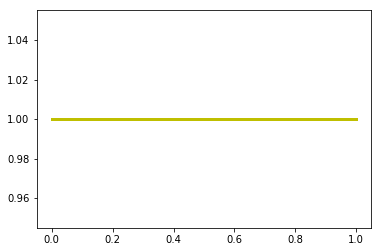

In [10]:
N = 1000

# Bin width
Delta = 0.02

# Bin edges
b = np.arange(0 ,1+Delta, Delta)

# Evaluate the density
g = np.ones(b.size)

# Draw the samples
u = np.random.rand(N)

counts,edges = np.histogram(u, bins=b)
plt.bar(b[:-1], counts/N/Delta, width=Delta)
#plt.hold(True)
plt.plot(b, g, linewidth=3, color='y')
#plt.hold(False)

plt.show()

The __plt.hist__ function (calling __np.histogram__) can do this calculation automatically if the option normed=True. However, when the grid is not uniform, it is better to write your own code to be sure what is going on.

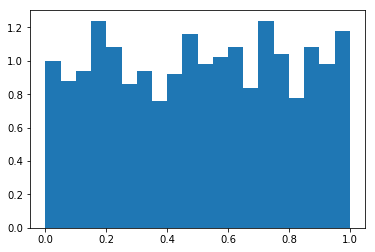

In [15]:
N = 1000
Delta = 0.05
b = np.arange(0 ,1+Delta, Delta)
g = np.ones(b.size)

u = np.random.rand(N)

#plt.hold(True)
plt.plot(b, g, linewidth=3, color='y')
plt.hist(u, bins=b, normed=True)
#plt.hold(False)

plt.show()

# Continuous Univariate Distributions
* Uniform $\mathcal{U}$
* Univariate Gaussian $\mathcal{N}$
$${\cal N}(x;\mu, v) =  \frac{1}{\sqrt{2\pi v}} \exp\left(-\frac12 \frac{(x - \mu)^2}{v}\right)  $$ 

* Gamma $\mathcal{G}$
$${\cal G}(\lambda; a, b) =  \frac{b^a \lambda^{a-1}}{\Gamma(a)} \exp( - b \lambda)$$

* Inverse Gamma $\mathcal{IG}$
$${\cal IG}(v; \alpha, \beta) =  \frac{\beta^\alpha}{\Gamma(\alpha) v^{\alpha+1}}  \exp(- \frac{\beta}{v}) $$

* Beta $\mathcal{B}$
$${\cal B}(r; \alpha, \beta) =  \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta) } r^{\alpha-1} (1-r)^{\beta-1}$$


In derivations, the distributions are often needed as building blocks. The following code segment prints the latex strings to be copied and pasted.

$\DeclareMathOperator{\trace}{Tr}$

In [16]:
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut

print('Gaussian')
L = nut.pdf2latex_gauss(x=r'x', m=r'm',v=r'\sigma^2')
display(HTML(nut.eqs2html_table(L)))

print('Gamma')
L = nut.pdf2latex_gamma(x=r'u', a=r'a',b=r'b')
display(HTML(nut.eqs2html_table(L)))

print('Inverse Gamma')
L = nut.pdf2latex_invgamma(x=r'z', a=r'a',b=r'b')
display(HTML(nut.eqs2html_table(L)))

print('Beta')
L = nut.pdf2latex_beta(x=r'\pi', a=r'\alpha',b=r'\beta')
display(HTML(nut.eqs2html_table(L)))



Gaussian


"\begin{eqnarray}\mathcal{N}(x; m, \sigma^2)\end{eqnarray}","\mathcal{N}(x; m, \sigma^2)"
\begin{eqnarray}\frac{1}{\sqrt{2\pi \sigma^2} } \exp\left(-\frac12 \frac{(x - m )^2}{\sigma^2}\right)\end{eqnarray},\frac{1}{\sqrt{2\pi \sigma^2} } \exp\left(-\frac12 \frac{(x - m )^2}{\sigma^2}\right)
\begin{eqnarray}\exp\left(-\frac{1}{2}\frac{x^2}{\sigma^2} + \frac{x m }{\sigma^2} -\frac{1}{2}\frac{m^2}{\sigma^2} -\frac{1}{2}\log(2{\pi}\sigma^2) \right)\end{eqnarray},\exp\left(-\frac{1}{2}\frac{x^2}{\sigma^2} + \frac{x m }{\sigma^2} -\frac{1}{2}\frac{m^2}{\sigma^2} -\frac{1}{2}\log(2{\pi}\sigma^2) \right)
\begin{eqnarray}-\frac{1}{2}\frac{x^2}{\sigma^2} + \frac{x m }{\sigma^2} -\frac{1}{2}\frac{m^2}{\sigma^2} -\frac{1}{2}\log \sigma^2 -\frac{1}{2}\log 2\pi\end{eqnarray},-\frac{1}{2}\frac{x^2}{\sigma^2} + \frac{x m }{\sigma^2} -\frac{1}{2}\frac{m^2}{\sigma^2} -\frac{1}{2}\log \sigma^2 -\frac{1}{2}\log 2\pi


Gamma


"\begin{eqnarray}\mathcal{G}(u; a, b)\end{eqnarray}","\mathcal{G}(u; a, b)"
\begin{eqnarray}\frac{ b^a u^{a-1}}{\Gamma(a)} \exp\left(-{b} {u}\right)\end{eqnarray},\frac{ b^a u^{a-1}}{\Gamma(a)} \exp\left(-{b} {u}\right)
\begin{eqnarray}\exp(({a} - 1)\log u - {b}{u} - \log \Gamma({a}) + {a} \log {b})\end{eqnarray},\exp(({a} - 1)\log u - {b}{u} - \log \Gamma({a}) + {a} \log {b})
\begin{eqnarray}({a} - 1)\log u - {b}{u} - \log \Gamma({a}) + {a} \log {b}\end{eqnarray},({a} - 1)\log u - {b}{u} - \log \Gamma({a}) + {a} \log {b}


Inverse Gamma


"\begin{eqnarray}\mathcal{IG}(z; a, b)\end{eqnarray}","\mathcal{IG}(z; a, b)"
\begin{eqnarray}\frac{ b^a }{\Gamma(a)z^{a+1}} \exp\left(-\frac{{b}}{{z}}\right)\end{eqnarray},\frac{ b^a }{\Gamma(a)z^{a+1}} \exp\left(-\frac{{b}}{{z}}\right)
\begin{eqnarray}\exp(-({a} + 1)\log z - \frac{{b}}{{z}} - \log \Gamma({a}) + {a} \log {b})\end{eqnarray},\exp(-({a} + 1)\log z - \frac{{b}}{{z}} - \log \Gamma({a}) + {a} \log {b})
\begin{eqnarray}-({a} + 1)\log z - \frac{{b}}{{z}} - \log \Gamma({a}) + {a} \log {b}\end{eqnarray},-({a} + 1)\log z - \frac{{b}}{{z}} - \log \Gamma({a}) + {a} \log {b}


Beta


"\begin{eqnarray}\mathcal{B}(\pi; \alpha, \beta)\end{eqnarray}","\mathcal{B}(\pi; \alpha, \beta)"
\begin{eqnarray}\frac{ \Gamma(\alpha+\beta) }{ \Gamma(\alpha) \Gamma(\beta) } \pi^{\alpha-1} (1-\pi)^{\beta-1}\end{eqnarray},\frac{ \Gamma(\alpha+\beta) }{ \Gamma(\alpha) \Gamma(\beta) } \pi^{\alpha-1} (1-\pi)^{\beta-1}
\begin{eqnarray}\exp\left(({\alpha} - 1)\log \pi + ({\beta} - 1)\log (1-\pi) + \log\Gamma({\alpha}+{\beta}) - \log \Gamma({\alpha}) - \log \Gamma({\beta})\right)\end{eqnarray},\exp\left(({\alpha} - 1)\log \pi + ({\beta} - 1)\log (1-\pi) + \log\Gamma({\alpha}+{\beta}) - \log \Gamma({\alpha}) - \log \Gamma({\beta})\right)
\begin{eqnarray}({\alpha} - 1)\log \pi + ({\beta} - 1)\log (1-\pi) + \log\Gamma({\alpha}+{\beta}) - \log \Gamma({\alpha}) - \log \Gamma({\beta})\end{eqnarray},({\alpha} - 1)\log \pi + ({\beta} - 1)\log (1-\pi) + \log\Gamma({\alpha}+{\beta}) - \log \Gamma({\alpha}) - \log \Gamma({\beta})


We will illustrate two alternative ways for sampling from continuous distributions. 

- The first method has minimal dependence on the numpy and scipy libraries. This is initially the preferred method. Only random variable generators and the $\log \Gamma(x)$ (__gammaln__) function is used and nothing more.

- The second method uses scipy. This is a lot more practical but requires knowing more about the internals of the library.


### Aside: The Gamma function $\Gamma(x)$
The gamma function $\Gamma(x)$ is the (generalized) factorial.
- Defined by 
$$\Gamma(x) = \int_0^{\infty} t^{x-1} e^{-t}\, dt$$
- For integer $x$, $\Gamma(x) = (x-1)!$. Remember that for positive integers $x$, the factorial function can be defined recursively $x! = (x-1)! x $ for $x\geq 1$.
- For real $x>1$, the gamma function satisfies
$$
\Gamma(x+1) = \Gamma(x) x
$$
- Interestingly, we have 
$$\Gamma(1/2) = \sqrt{\pi}$$
- Hence
$$\Gamma(3/2) = \Gamma(1/2 + 1) = \Gamma(1/2) (1/2) = \sqrt{\pi}/2$$
- It is available in many numerical computation packages, in python it is available as __scipy.special.gamma__.
- To compute $\log \Gamma(x)$, you should always use the implementation as __scipy.special.gammaln__. The gamma function blows up super-exponentially so numerically you should never evaluate $\log \Gamma(x)$ as
```python
import numpy as np
import scipy.special as sps
np.log(sps.gamma(x))  # Don't 
sps.gammaln(x)        # Do
```
- A related function is the Beta function
$$B(x,y) = \int_0^{1} t^{x-1} (1-t)^{y-1}\, dt$$
- We have
$$B(x,y) = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x+y)}$$
- Both $\Gamma(x)$ and $B(x)$ pop up as normalizing constant of the gamma and beta distributions.

#### Derivatives of $\Gamma(x)$
- <span style="color:red"> </span> The derivatives of  $\log \Gamma(x)$ pop up quite often when fitting densities. The first derivative has a specific name,  often called the digamma function or the psi function.
$$
\Psi(x) \equiv \frac{d}{d x} \log \Gamma(x) 
$$
- It is available as __scipy.special.digamma__ or __scipy.special.psi__

- Higher order derivatives of the $\log \Gamma(x)$ function (including digamma itself) are available as __scipy.special.polygamma__


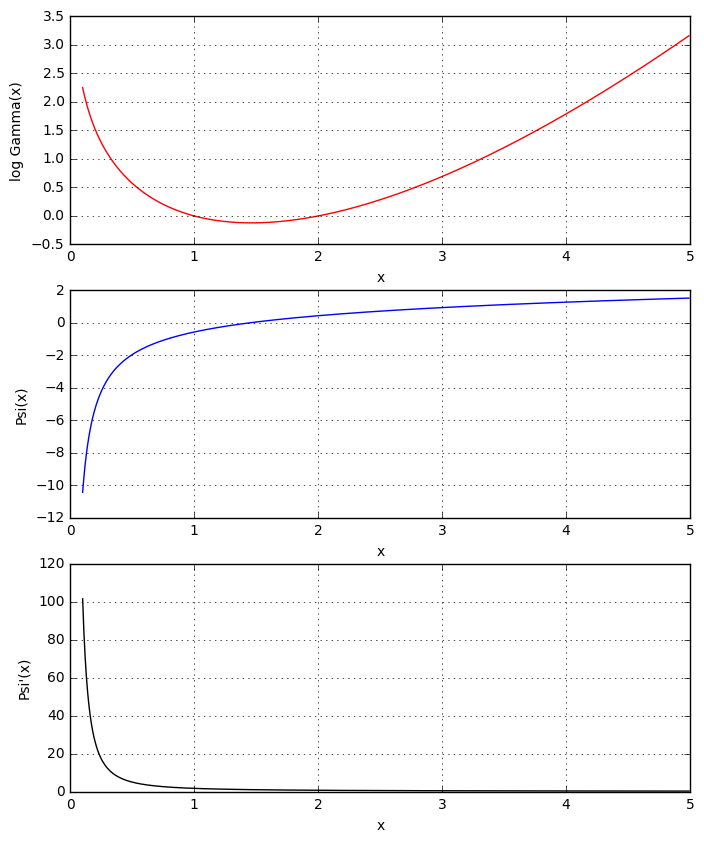

In [10]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

x = np.arange(0.1,5,0.01)

f = sps.gammaln(x)
df = sps.psi(x)

# First derivative of the digamma function
ddf = sps.polygamma(1,x)
# sps.psi(x) == sps.polygamma(0,x)

plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.plot(x, f, 'r')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('log Gamma(x)')

plt.subplot(3,1,2)
plt.grid(True)
plt.plot(x, df, 'b')
plt.xlabel('x')
plt.ylabel('Psi(x)')

plt.subplot(3,1,3)
plt.plot(x, ddf, 'k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Psi\'(x)')

plt.show()

#### Stirling's approximation

An important approximation to the factorial is the famous Stirling's approximation

\begin{align}
n! \sim \sqrt{2 \pi n}\left(\frac{n}{e}\right)^n
\end{align}

\begin{align}
\log \Gamma(x+1) \approx \frac{1}{2}\log(2 \pi) + x \log(x) - \frac{1}{2} \log(x) 
\end{align}




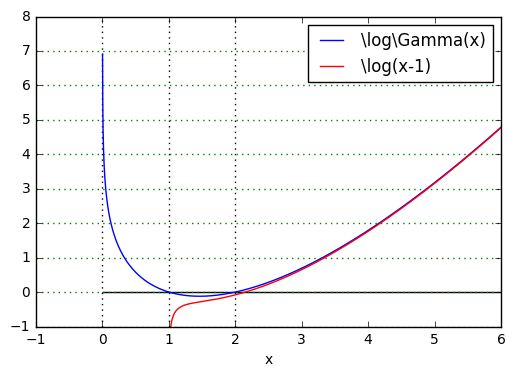

In [5]:
import matplotlib.pylab as plt
import numpy as np
from scipy.special import polygamma
from scipy.special import gammaln as loggamma
from scipy.special import psi

x = np.arange(0.001,6,0.001)
ylim = [-1,8]
xlim = [-1,6]
plt.plot(x, loggamma(x), 'b')
stir = x*np.log(x)-x +0.5*np.log(2*np.pi*x)
plt.plot(x+1, stir,'r')
plt.hlines(0,0,8)
plt.vlines([0,1,2],ylim[0],ylim[1],linestyles=':')
plt.hlines(range(ylim[0],ylim[1]),xlim[0],xlim[1],linestyles=':',colors='g')
plt.ylim(ylim)
plt.xlim(xlim)

plt.legend([r'\log\Gamma(x)',r'\log(x-1)'],loc=1)
plt.xlabel('x')
plt.show()

# Sampling from Continuous Univariate Distributions

## Sampling using numpy.random

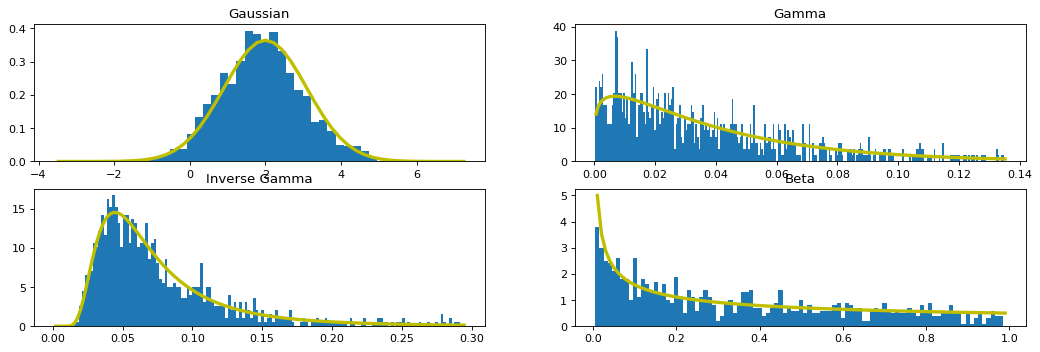

In [2]:

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.special import gammaln


def plot_histogram_and_density(N, c, edges, dx, g, title='Put a title'):
    '''
     N  : Number of Datapoints
     c  : Counts, as obtained from np.histogram function
     edges : bin edges, as obtained from np.histogram
     dx : The bin width
     g  : Density evaluated at the points given in edges
     title : for the plot
    '''
    plt.bar(edges[:-1], c/N/dx, width=dx)
#    plt.hold(True)
    plt.plot(edges, g, linewidth=3, color='y')
#    plt.hold(False)
    plt.title(title)

def log_gaussian_pdf(x, mu, V):
    return -0.5*np.log(2*np.pi*V) -0.5*(x-mu)**2/V

def log_gamma_pdf(x, a, b):
    return (a-1)*np.log(x) - b*x - gammaln(a) + a*np.log(b)

def log_invgamma_pdf(x, a, b):
    return -(a+1)*np.log(x) - b/x - gammaln(a) + a*np.log(b)

def log_beta_pdf(x, a, b):
    return - gammaln(a) - gammaln(b) + gammaln(a+b) + np.log(x)*(a-1) + np.log(1-x)*(b-1) 


N = 1000

# Univariate Gaussian
mu = 2    # mean
V = 1.2   # Variance
x_normal = np.random.normal(mu, np.sqrt(V), N)

dx = 10*np.sqrt(V)/50
x = np.arange(mu-5*np.sqrt(V) ,mu+5*np.sqrt(V),dx)
g = np.exp(log_gaussian_pdf(x, mu, V))

#g = scs.norm.pdf(x, loc=mu, scale=np.sqrt(V))
c,edges = np.histogram(x_normal, bins=x)

plt.figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plot_histogram_and_density(N, c, x, dx, g, 'Gaussian')


## Gamma
# Shape
a = 1.2
# inverse scale
b = 30

# Generate unit scale first than scale with inverse scale parameter b
x_gamma = np.random.gamma(a, 1, N)/b
dx = np.max(x_gamma)/500
x = np.arange(dx, 250*dx, dx)

g = np.exp(log_gamma_pdf(x, a, b))
c,edges = np.histogram(x_gamma, bins=x)

plt.subplot(2,2,2)
plot_histogram_and_density(N, c, x, dx, g, 'Gamma')


## Inverse Gamma
a = 3.5
b = 0.2

x_invgamma = b/np.random.gamma(a, 1, N)
dx = np.max(x_invgamma)/500
x = np.arange(dx, 150*dx, dx)
g = np.exp(log_invgamma_pdf(x,a,b))
c,edges = np.histogram(x_invgamma, bins=x)

plt.subplot(2,2,3)
plot_histogram_and_density(N, c, x, dx, g, 'Inverse Gamma')

## Beta 
a = 0.5
b = 1
x_beta = np.random.beta(a, b, N)
dx = 0.01
x = np.arange(dx, 1, dx)
g = np.exp(log_beta_pdf(x, a, b))
c,edges = np.histogram(x_beta, bins=x)

plt.subplot(2,2,4)
plot_histogram_and_density(N, c, x, dx, g, 'Beta')

plt.show()

## Sampling using scipy.stats

NameError: name 'plot_histogram_and_density' is not defined

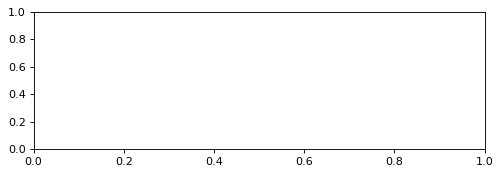

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as scs



N = 2000

# Univariate Gaussian
mu = 2    # mean
V = 1.2   # Variance

rv_normal = scs.norm(loc=mu, scale=np.sqrt(V))
x_normal = rv_normal.rvs(size=N)

dx = 10*np.sqrt(V)/50
x = np.arange(mu-5*np.sqrt(V) ,mu+5*np.sqrt(V),dx)
g = rv_normal.pdf(x)

c,edges = np.histogram(x_normal, bins=x)

plt.figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plot_histogram_and_density(N, c, x, dx, g, 'Gaussian')


## Gamma
a = 3.2
b = 30

# The following is equivalent to our parametrization of gamma, note the 1/b term
rv_gamma = scs.gamma(a, scale=1/b)
x_gamma = rv_gamma.rvs(N)
dx = np.max(x_gamma)/500
x = np.arange(0, 250*dx, dx)
g = rv_gamma.pdf(x)
c,edges = np.histogram(x_gamma, bins=x)

plt.subplot(2,2,2)
plot_histogram_and_density(N, c, x, dx, g, 'Gamma')



## Inverse Gamma
a = 3.5
b = 0.2

# Note the b term
rv_invgamma = scs.invgamma(a, scale=b)
x_invgamma = rv_invgamma.rvs(N)
dx = np.max(x_invgamma)/500
x = np.arange(dx, 150*dx, dx)
g = rv_invgamma.pdf(x)
c,edges = np.histogram(x_invgamma, bins=x)

plt.subplot(2,2,3)
plot_histogram_and_density(N, c, x, dx, g, 'Inverse Gamma')

## Beta 
a = 0.7
b = 0.8

rv_beta = scs.beta(a, b)
x_beta = rv_beta.rvs(N)
dx = 0.02
x = np.arange(0, 1+dx, dx)
g = rv_beta.pdf(x)
c,edges = np.histogram(x_beta, bins=x)

plt.subplot(2,2,4)
plot_histogram_and_density(N, c, x, dx, g, 'Beta')

plt.show()

# Sampling from Discrete Densities
* Bernoulli $\mathcal{BE}$
$$
{\cal BE}(r; w)  =  w^r (1-w)^{1-r} \;\; \text{if} \; r \in \{0, 1\} 
$$

* Binomial $\mathcal{BI}$
$${\cal BI}(r; L, w)  =   \binom{L}{r, (L-r)} w^r (1-w)^{L-r} \;\; \text{if} \; r \in \{0, 1, \dots, L\} $$

Here, the binomial coefficient is defined as 
$$
\binom{L}{r, (L-r)} = \frac{N!}{r!(L-r)!}
$$

Note that 
$$
{\cal BE}(r; w) = {\cal BI}(r; L=1, w)
$$

* Poisson $\mathcal{PO}$, with intensity $\lambda$
$${\cal PO}(x;\lambda) =  \frac{e^{-\lambda} \lambda^x}{x!} = \exp(x \log \lambda - \lambda - \log\Gamma(x+1)) $$ 



Given samples on nonnegative integers, we can obtain histograms easily using __np.bincount__. 

```python
c = np.bincount(samples)
```

The functionality is equivalent to the following sniplet, while implementation is possibly different and more efficient.

```python
upper_bound = np.max()
c = np.zeros(upper_bound+1)
for i in samples:
    c[i] += 1
```

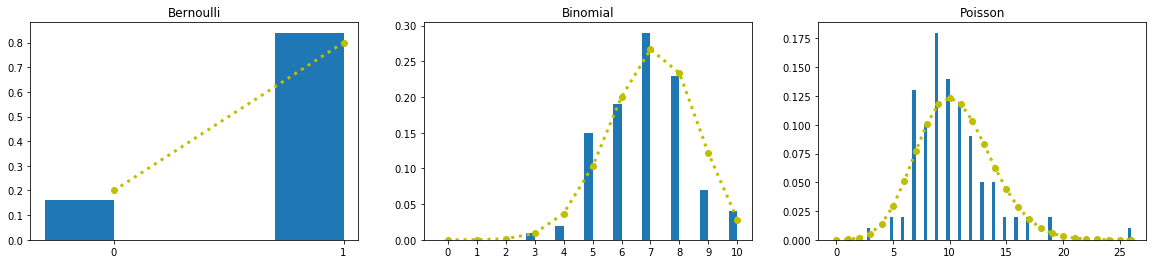

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_and_pmf(N, c, domain, dx, g, title='Put a title'):
    '''
     N  : Number of Datapoints
     c  : Counts, as obtained from np.bincount function
     domain : integers for each c, same size as c
     dx : The bin width
     g  : Density evaluated at the points given in edges
     title : for the plot
    '''
    plt.bar(domain-dx/2, c/N, width=dx)
#    plt.hold(True)
    plt.plot(domain, g, 'ro:', linewidth=3, color='y')
#    plt.hold(False)
    plt.title(title)

def log_poisson_pdf(x, lam):
    return -lam + x*np.log(lam) - gammaln(x+1)

def log_bernoulli_pdf(r, pr):
    return r*np.log(pr) + (1-r)*np.log(1 - pr)

def log_binomial_pdf(r, pr, L):
    return gammaln(L+1) - gammaln(r+1) - gammaln(L-r+1) + r*np.log(pr) + (L-r)*np.log(1 - pr)

    
N = 100
pr = 0.8

# For plots
bin_width = 0.3

# Bernoulli
L = 1
x_bern = np.random.binomial(n=L, p=pr, size=N)
c = np.bincount(x_bern, minlength=L+1)
g = np.exp(log_bernoulli_pdf(np.arange(L+1), pr))

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plot_histogram_and_pmf(N, c, np.arange(L+1), bin_width, g, 'Bernoulli')
plt.xticks([0,1])


# Binomial
L = 10
pr = 0.7
x_binom = np.random.binomial(n=L, p=pr, size=N)
c = np.bincount(x_binom, minlength=L+1)
g = np.exp(log_binomial_pdf(np.arange(L+1), pr, L))

plt.subplot(1,3,2)
plot_histogram_and_pmf(N, c, np.arange(L+1), bin_width, g, 'Binomial')
plt.xticks(np.arange(L+1))

# Poisson
intensity = 10.5
x_poiss = np.random.poisson(intensity, size =N )
c = np.bincount(x_poiss)

x = np.arange(len(c))
g = np.exp(log_poisson_pdf(x, intensity))

plt.subplot(1,3,3)
plot_histogram_and_pmf(N, c, x, bin_width, g, 'Poisson')


## Bernoulli, Binomial, Categorical and Multinomial Distributions

The Bernoulli and Binomial distributions are quite simple and well known distributions on small integers, so it may come as a surprise that they have another, less obvious but arguably more useful representation as discrete multivariate densities. This representation makes the link to categorical distributions where there are more than two possible outcomes. Finally, all Bernoulli, Binomial or Categorical distributions are special cases of Multinomial distribution.

### Bernoulli
Recall the Bernoulli distribution $r \in \{0, 1\}$
$$
{\cal BE}(r; w)  =  w^r (1-w)^{1-r}  
$$

We will define $\pi_0 = 1-w$ and $\pi_1 = w$, such that $\pi_0 + \pi_1 = 1$. The parameter vector is $\pi = (\pi_0, \pi_1)$

We will also introduce a positional encoding such that 

\begin{eqnarray}
r = 0 & \Rightarrow & s = (1, 0) \\
r = 1 & \Rightarrow & s = (0, 1) 
\end{eqnarray}

In other words $s = (s_0, s_1)$ is a 2-dimensional vector where 
$$s_0, s_1 \in \{0,1\}\;\text{and}\; s_0 + s_1 = 1$$ 

We can now write the Bernoulli density 

$$
p(s | \pi)  =  \pi_0^{s_0} \pi_1^{s_1}
$$

### Binomial
Similarly, recall the Binomial density where $r \in \{0, 1, \dots, L\}$

$${\cal BI}(r; L, w)  =   \binom{L}{r, (L-r)} w^r (1-w)^{L-r}  $$

We will again define $\pi_0 = 1-w$ and $\pi_1 = w$, such that $\pi_0 + \pi_1 = 1$. The parameter vector is $\pi = (\pi_0, \pi_1)$

\begin{eqnarray}
r = 0 & \Rightarrow & s = (L, 0) \\
r = 1 & \Rightarrow & s = (L-1, 1)\\
r = 2 & \Rightarrow & s = (L-2, 2)\\
\dots \\
r = L & \Rightarrow & s = (0, L)
\end{eqnarray}

where $s = (s_0, s_1)$ is a 2-dimensional vector where $$s_0, s_1 \in \{0,\dots,L\} \;\text{and}\; s_0 + s_1  = L$$ 

We can now write the Binomial density as
$$
p(s | \pi)  =  \binom{L}{s_0, s_1} \pi_0^{s_0} \pi_1^{s_1}
$$

### Categorical (Multinouilli)

One of the advantages of this new notation is that we can write the density even if the outcomes are not numerical. For example, the result of a single coin flip experiment when $r \in \{$ 'Tail', 'Head' $\}$ where the probability of 'Tail' is $w$ can be written as
$$
p(r | w)  =  w^{\indi{r=\text{'Tail'}}} (1-w)^{\indi{r=\text{'Head'}}}
$$

We define $s_0 = \indi{r=\text{'Head'}}$ and $s_1 = \indi{r=\text{'Tail'}}$, then the density can be written in the same form as
$$
p(s | \pi)  = \pi_0^{s_0} \pi_1^{s_1}
$$
where $\pi_0 = 1-w$ and $\pi_1 = w$.

More generally, when $r$ is from a set with $K$ elements, i.e., $r \in R = \{ v_0, v_1, \dots, v_{K-1} \}$ with probability of the event $r = v_k$ given as $\pi_k$, we define $s = (s_0, s_1, \dots, s_{K-1})$ for $k=0,\dots, K-1$

$$
s_k = \indi{r=v_k}
$$

Note that by construction, we have $\sum_k s_k = 1$. 
The resulting density, known as the Categorical density, can be writen as 

$$
p(s|\pi) = \pi_0^{s_0} \pi_1^{s_1} \dots \pi_{K-1}^{s_{K-1}}
$$

### Multinomial 

When drawing from a categorical distribution, one chooses a single category from $K$ options with given probabilities. A standard model for this is placing a single ball into $K$ different bins. The vector $s = (s_0, s_1, \dots,s_k, \dots, s_{K-1})$ represents how many balls eack bin $k$ contains.

Now, place $L$ balls instead of one into $K$ bins with placing each ball idependently into bin $k$ where $k \in\{0,\dots,K-1\}$ with the probability $\pi_k$. The multinomial is the joint distribution of $s$ where $s_k$ is the number of balls placed into bin $k$. 

The density will be denoted as 

$${\cal M}(s; L, \pi)  =  \binom{L}{s_0, s_1, \dots, s_{K-1}}\prod_{k=0}^{K-1} \pi_k^{s_k} $$

Here $\pi \equiv [\pi_0, \pi_2, \dots, \pi_{K-1} ]$ is the probability vector and $L$ is referred as the _index parameter_.
Clearly, we have the normalization constraint $ \sum_k \pi_k = 1$ and realization of the counts $s$ satisfy 
$ \sum_k s_k = L $. 

Here, the _multinomial_ coefficient is defined as 

$$\binom{L}{s_0, s_1, \dots, s_{K-1}} = \frac{L!}{s_0! s_1! \dots s_{K-1}!}$$

Binomial, Bernoulli and Categorical distributions are all special cases of the Multinomial distribution, with a suitable representation.

The picture is as follows:

~~~
|Balls/Bins | $2$ Bins | $K$ Bins |  
|-------- | -------- | ---------|
| $1$ Ball  | Bernoulli ${\cal BE}$ | Categorical  ${\cal C}$ |
|-------- | -------- | ---------|
| $L$ Balls | Binomial ${\cal BI}$ | Multinomial ${\cal M}$ |
~~~

Murphy calls the categorical distribution ($1$ Ball, $K$ Bins) as the Multinoulli. This is non-standard but logical (and somewhat cute).

It is common to consider Bernoulli and Binomial as scalar random variables. However, when we think of them as special case of a Multinomial it is better to think of them as bivariate, albeit degenerate, random variables, as 
illustrated in the following cell along with an alternative visualization. 

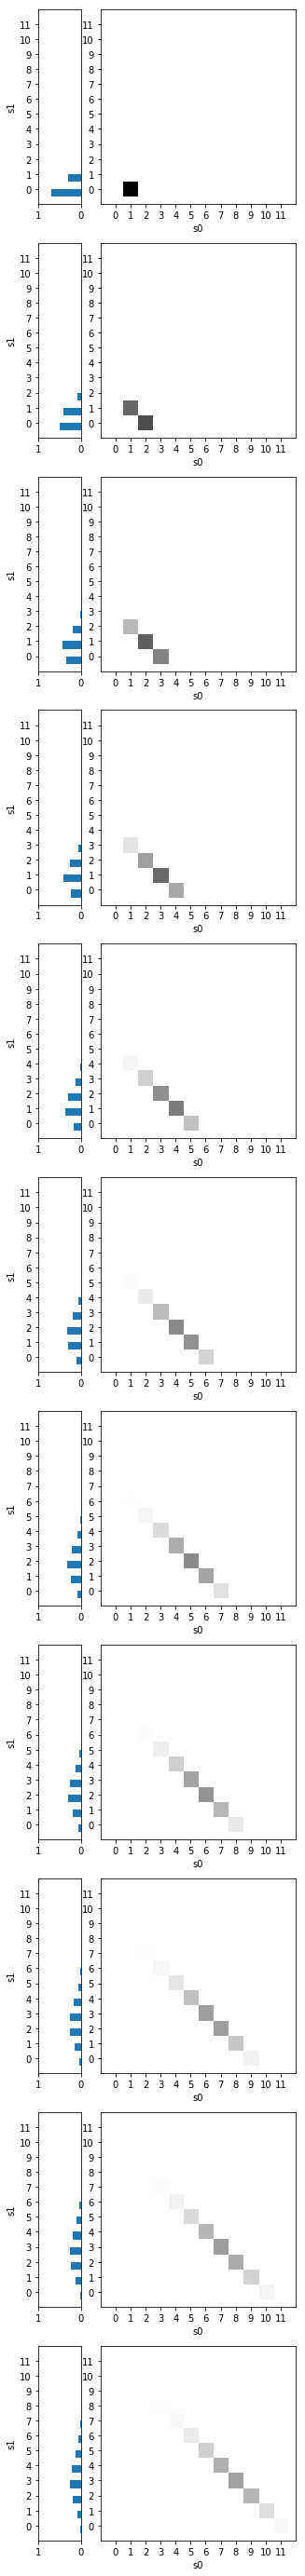

In [4]:
# The probability parameter
pr = 0.3

fig = plt.figure(figsize=(16,50), edgecolor=None)

maxL = 12
plt.subplot(maxL-1,2,1)
plt.grid(False)
# Set up the scalar binomial density as a bivariate density  
for L in range(1,maxL):
    r = np.arange(L+1)
    p = np.exp(log_binomial_pdf(r, pr=pr, L=L))
    A = np.zeros(shape=(13,13))
    for s in range(L):
        s0 = s
        s1 = L-s
        A[s0, s1] = p[s]

    #plt.subplot(maxL-1,2,2*L-1)
#    plt.bar(r-0.25, p, width=0.5)
#    ax.set_xlim(-1,maxL)
#    ax.set_xticks(range(0,maxL))
    if True:
        plt.subplot(maxL-1,2,2*L-1)
        plt.barh(bottom=r-0.25, width=p, height=0.5)
        ax2 = fig.gca()
        pos = ax2.get_position()
        pos2 = [pos.x0, pos.y0, 0.04, pos.height]
        ax2.set_position(pos2)
        ax2.set_ylim(-1,maxL)
        ax2.set_yticks(range(0,maxL))
        ax2.set_xlim([0,1])
        ax2.set_xticks([0,1])
        plt.ylabel('s1')
        ax2.invert_xaxis()
    
    plt.subplot(maxL-1,2,2*L)
    plt.imshow(A,  interpolation='nearest', origin='lower',cmap='gray_r',vmin=0,vmax=0.7)
    plt.xlabel('s0')
        
    ax1 = fig.gca()
    
    pos = ax1.get_position()
    pos2 = [pos.x0-0.45, pos.y0, pos.width, pos.height]
    ax1.set_position(pos2)

    ax1.set_ylim(-1,maxL)
    ax1.set_yticks(range(0,maxL))
    ax1.set_xlim(-1,maxL)
    ax1.set_xticks(range(0,maxL))


    
plt.show()

The following cell illustrates sampling from the Multinomial density.

In [5]:

# Number of samples
sz = 3

# Multinomial
p = np.array([0.3, 0.1, 0.1, 0.5])
K = len(p) # number of Bins
L = 20     # number of Balls

print('Multinomial with number of bins K = {K} and Number of balls L = {L}'.format(K=K,L=L))
print(np.random.multinomial(L, p, size=sz))

# Categorical 
L = 1     # number of Balls

print('Categorical with number of bins K = {K} and a single ball L=1'.format(K=K))
print(np.random.multinomial(L, p, size=sz))

# Binomial
p = np.array([0.3, 0.7])
K = len(p) # number of Bins = 2
L = 20     # number of Balls

print('Binomial with two bins K=2 and L={L} balls'.format(L=L))
print(np.random.multinomial(L, p, size=sz))

# Bernoulli
L = 1     # number of Balls
p = np.array([0.3, 0.7])
K = len(p) # number of Bins = 2

print('Bernoulli, two bins and a single ball')
print(np.random.multinomial(L, p, size=sz))



Multinomial with number of bins K = 4 and Number of balls L = 20
[[ 6  3  2  9]
 [ 4  1  3 12]
 [ 7  1  5  7]]
Categorical with number of bins K = 4 and a single ball L=1
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Binomial with two bins K=2 and L=20 balls
[[ 8 12]
 [ 4 16]
 [ 6 14]]
Bernoulli, two bins and a single ball
[[0 1]
 [0 1]
 [1 0]]
